In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rcc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [3]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


(array([  842.,     0.,  1565.,     0.,     0.,  2871.,     0.,  5077.,
            0., 13131.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

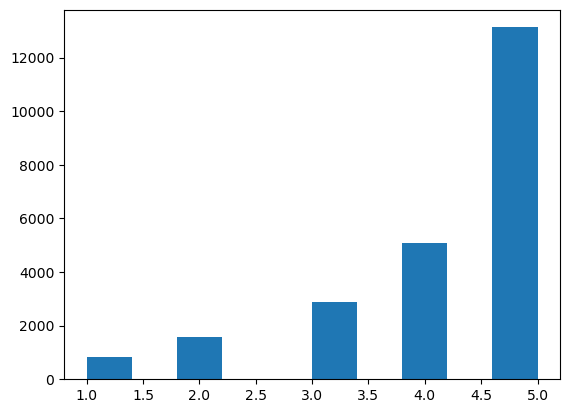

In [6]:
plt.hist(df['Rating'],label=df['Recommended IND'])

(array([1646., 4421., 6575., 4516., 3229., 2215.,  691.,  112.,   68.,
          13.]),
 array([18. , 26.1, 34.2, 42.3, 50.4, 58.5, 66.6, 74.7, 82.8, 90.9, 99. ]),
 <BarContainer object of 10 artists>)

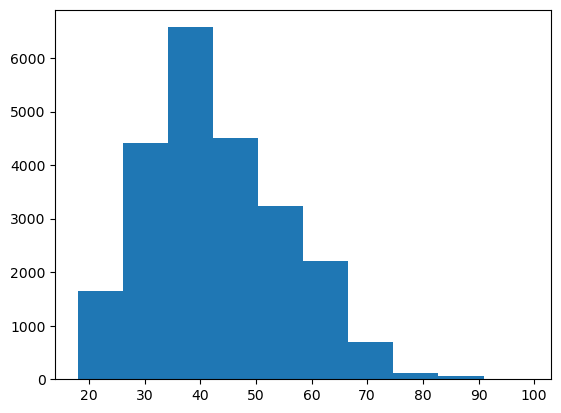

In [7]:
plt.hist(df['Age'],label=df['Recommended IND'])

<Axes: xlabel='Recommended IND', ylabel='Age'>

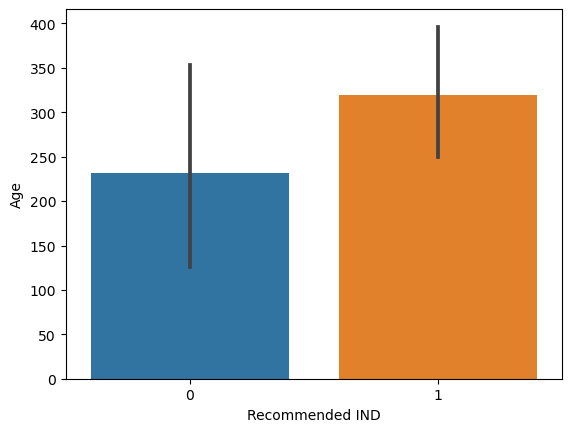

In [8]:
sns.barplot(y=df['Age'].value_counts(),x=df['Recommended IND'])

In [3]:
df['Review Text'].head()

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
Name: Review Text, dtype: object

In [4]:
df['Review Text']=df['Review Text'].str.lower()

In [5]:
def remove_punc(text):
    k=re.sub('[^a-z]'," ",text)
    return "".join(k)

In [6]:
df['Review Text']=df['Review Text'].astype(str)

In [7]:
df['Review Text']=df['Review Text'].apply(lambda text: remove_punc(text))

In [8]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,absolutely wonderful silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,love this dress it s sooo pretty i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,i love love love this jumpsuit it s fun fl...,5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,i was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,it reminds me of maternity clothes soft stre...,3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through",this fit well but the top was very see throug...,3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",i bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [15]:
stopword=stopwords.words('english')

In [16]:
def remove_stop(text):
    return " ".join(w for w in text.split() if w not in stopword)

In [17]:
df['Review Text']=df['Review Text'].astype(str)

In [18]:
df['Review Text']=df['Review Text'].apply(lambda text: remove_stop(text))

In [19]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,love dress sooo pretty happened find store gla...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,high hopes dress really wanted work initially ...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,love love love jumpsuit fun flirty fabulous ev...,5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,happy snag dress great price easy slip flatter...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,reminds maternity clothes soft stretchy shiny ...,3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through",fit well top see never would worked glad able ...,3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",bought dress wedding summer cute unfortunately...,3,1,2,General,Dresses,Dresses


In [20]:
from collections import Counter

In [21]:
cn=Counter()
for i in df['Review Text'].values:
    for j in i.split():
        cn[j]+=1
most_freq=set([w for (w,wc) in cn.most_common(20)])
most_freq

{'color',
 'dress',
 'fabric',
 'fit',
 'flattering',
 'great',
 'like',
 'little',
 'look',
 'love',
 'one',
 'ordered',
 'perfect',
 'really',
 'size',
 'small',
 'top',
 'wear',
 'well',
 'would'}

In [22]:
def remove_fword(text):
    return " ".join(w for w in text.split() if w not in most_freq)

In [23]:
df['Review Text']=df['Review Text'].apply(lambda text: remove_fword(text))

In [24]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,sooo pretty happened find store glad bc never ...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,high hopes wanted work initially petite usual ...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,jumpsuit fun flirty fabulous every time get no...,5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,shirt due adjustable front tie length leggings...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,happy snag price easy slip cut combo,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,reminds maternity clothes soft stretchy shiny ...,3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through",see never worked glad able try store order onl...,3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",bought wedding summer cute unfortunately mediu...,3,1,2,General,Dresses,Dresses


In [25]:
n=20
rare_words=set([w for (w,wc) in cn.most_common()[:-n-1:-1]])
rare_words

{'bett',
 'blaring',
 'bottome',
 'camoflauges',
 'chu',
 'contract',
 'coplaints',
 'daker',
 'donse',
 'fiends',
 'inducing',
 'insufficient',
 'linking',
 'mauv',
 'pantyhose',
 'peephole',
 'peitte',
 'platinum',
 'population',
 'twinkle'}

In [26]:
def remove_rword(text):
    return " ".join(w for w in text.split() if w not in rare_words)

In [27]:
df['Review Text']=df['Review Text'].apply(lambda text: remove_rword(text))

In [28]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,sooo pretty happened find store glad bc never ...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,high hopes wanted work initially petite usual ...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,jumpsuit fun flirty fabulous every time get no...,5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,shirt due adjustable front tie length leggings...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,happy snag price easy slip cut combo,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,reminds maternity clothes soft stretchy shiny ...,3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through",see never worked glad able try store order onl...,3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",bought wedding summer cute unfortunately mediu...,3,1,2,General,Dresses,Dresses


In [29]:
df['Review Text']=df['Review Text'].apply(lambda text: " ".join([w for w in text.split() if len(w)>3]))

In [30]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,sooo pretty happened find store glad never onl...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,high hopes wanted work initially petite usual ...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,jumpsuit flirty fabulous every time nothing co...,5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,shirt adjustable front length leggings sleevel...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,happy snag price easy slip combo,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,reminds maternity clothes soft stretchy shiny ...,3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through",never worked glad able store order online diff...,3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",bought wedding summer cute unfortunately mediu...,3,1,2,General,Dresses,Dresses


In [31]:
from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer,WordNetLemmatizer

In [32]:
Ps=PorterStemmer()
Ss=SnowballStemmer(language='english')
Ls=LancasterStemmer()
Wl=WordNetLemmatizer()

In [33]:
def pstemmer(text):
    return " ".join(Ps.stem(w) for w in text.split())

In [34]:
df['Review Text_ps']=df['Review Text'].apply(lambda text: pstemmer(text))

In [35]:
def sstemmer(text):
    return " ".join(Ss.stem(w) for w in text.split())

In [36]:
df['Review Text_ss']=df['Review Text'].apply(lambda text: sstemmer(text))

In [37]:
def lstemmer(text):
    return " ".join(Ls.stem(w) for w in text.split())

In [38]:
df['Review Text_ls']=df['Review Text'].apply(lambda text: lstemmer(text))

In [39]:
def wlemme(text):
    return " ".join(Wl.lemmatize(w) for w in text.split())

In [40]:
df['Review Text_wl']=df['Review Text'].apply(lambda text: wlemme(text))

In [41]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Text_ps,Review Text_ss,Review Text_ls,Review Text_wl
0,0,767,33,NaN,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,absolut wonder silki sexi comfort,absolut wonder silki sexi comfort,absolv wond silky sexy comfort,absolutely wonderful silky sexy comfortable
1,1,1080,34,NaN,sooo pretty happened find store glad never onl...,5,1,4,General,Dresses,Dresses,sooo pretti happen find store glad never onlin...,sooo pretti happen find store glad never onlin...,sooo pretty hap find stor glad nev onlin petit...,sooo pretty happened find store glad never onl...
2,2,1077,60,Some major design flaws,high hopes wanted work initially petite usual ...,3,0,0,General,Dresses,Dresses,high hope want work initi petit usual found ou...,high hope want work initi petit usual found ou...,high hop want work init petit us found out fac...,high hope wanted work initially petite usual f...
3,3,1049,50,My favorite buy!,jumpsuit flirty fabulous every time nothing co...,5,1,0,General Petite,Bottoms,Pants,jumpsuit flirti fabul everi time noth compliment,jumpsuit flirti fabul everi time noth compliment,jumpsuit flirty fab every tim noth comply,jumpsuit flirty fabulous every time nothing co...
4,4,847,47,Flattering shirt,shirt adjustable front length leggings sleevel...,5,1,6,General,Tops,Blouses,shirt adjust front length leg sleeveless pair ...,shirt adjust front length leg sleeveless pair ...,shirt adjust front leng leg sleeveless pair ca...,shirt adjustable front length legging sleevele...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,happy snag price easy slip combo,5,1,0,General Petite,Dresses,Dresses,happi snag price easi slip combo,happi snag price easi slip combo,happy snag pric easy slip combo,happy snag price easy slip combo
23482,23482,862,48,Wish it was made of cotton,reminds maternity clothes soft stretchy shiny ...,3,1,0,General Petite,Tops,Knits,remind matern cloth soft stretchi shini materi...,remind matern cloth soft stretchi shini materi...,remind matern cloth soft stretchy shiny mat dr...,reminds maternity clothes soft stretchy shiny ...
23483,23483,1104,31,"Cute, but see through",never worked glad able store order online diff...,3,0,1,General Petite,Dresses,Dresses,never work glad abl store order onlin differ,never work glad abl store order onlin differ,nev work glad abl stor ord onlin diff,never worked glad able store order online diff...
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",bought wedding summer cute unfortunately mediu...,3,1,2,General,Dresses,Dresses,bought wed summer cute unfortun medium fit wai...,bought wed summer cute unfortun medium fit wai...,bought wed sum cut unfortun med fit waist perf...,bought wedding summer cute unfortunately mediu...


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              23486 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
 11  Review Text_ps           23486 non-null  object
 12  Review Text_ss           23486 non-null  object
 13  Review Text_ls           23486 non-null  object
 14  Review Text_wl           23486 non-nul

In [43]:
df['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [54]:
from imblearn.over_sampling import SMOTE
s=SMOTE()

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [46]:
cv=CountVectorizer()
tf=TfidfVectorizer()

In [47]:
data=tf.fit_transform(df['Review Text_wl'])
data2=cv.fit_transform(df['Review Text_wl'])

In [48]:
x=pd.DataFrame(data.toarray())

In [49]:
X=pd.DataFrame(data2.toarray())
X[['Rating','Age','Positive Feedback Count']]=df[['Rating','Age','Positive Feedback Count']]
X.columns = X.columns.astype(str)

In [ ]:
y=df['Recommended IND']

In [67]:
dat=s.fit_resample(x,y=df['Recommended IND'])

In [68]:
x=pd.DataFrame(dat[0])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, dat[1], test_size=0.33, random_state=42)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
lr=LogisticRegression()

In [79]:
lr.fit(x_train,y_train)

LogisticRegression()

In [80]:
y_pred=lr.predict(x_test)

In [81]:
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      6400
           1       0.91      0.84      0.88      6348

    accuracy                           0.88     12748
   macro avg       0.88      0.88      0.88     12748
weighted avg       0.88      0.88      0.88     12748

[[5905  495]
 [1022 5326]]
